In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes = True)  # --> for getting nice backgroud to the graphs
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# Buisseness Problem

Netflix is facing increasing competition from other streaming services, such as Disney+, HBO Max, and Amazon Prime Video.

In order to stay ahead of the competition, Netflix needs to understand its users' behavior and preferences better. 

This will help Netflix to create content that its users will enjoy and to target its marketing campaigns more effectively



# Assumptions:

1) The Netflix dataset is representative of the overall Netflix user population.

2) The factors that are associated with user retention at Netflix are consistent over time.

3) The statistical methods that we use to analyze the data are appropriate for the task.

4) Netflix has access to the entire information or user behavior of its users.



# Research Questions:

1) What are the factors that are most predictive of user retention at Netflix?

2) How does the user's subscription type affect their likelihood of staying with Netflix?

3) How does the user's monthly revenue affect their likelihood of staying with Netflix?

4) How does the user's join date affect their likelihood of staying with Netflix?

5) How does the user's last payment date affect their likelihood of staying with Netflix?

6) How does the user's country affect their likelihood of staying with Netflix?

7) How does the user's age affect their likelihood of staying with Netflix?

8) How does the user's gender affect their likelihood of staying with Netflix?

9) How does the user's device affect their likelihood of staying with Netflix?

10) How does the user's plan duration affect their likelihood of staying with Netflix?

11) How does the user's active status affect their likelihood of staying with Netflix?



# Hypothesis :



We hypothesize that there are certain factors that are associated with user retention at Netflix. 

These factors may include the user's subscription type, monthly revenue, join date, last payment date, country, age, 

gender, device, plan duration, and active status. By understanding these factors, Netflix can identify users who are at 

risk of churning and take steps to prevent them from leaving.

In [2]:
# Load the Netflix userbase dataset

Data = pd.read_csv(r'C:\Users\mayur\Desktop\Netflix Userbase.csv')

In [3]:
# Exploratory Data Analysis (EDA)
# Let's start by inspecting the first few rows of the dataset
Data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
# Basic Statistics Summary
Data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [5]:
# Checking Null Values 
Data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [6]:
# checking Duplicate Values 
Data.duplicated().sum()

0

In [7]:
# Checking Data type of every column
Data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [8]:
# Converting datatype of join date and Last Payment Date from object to Date type
Data['Join Date'] = pd.to_datetime(Data['Join Date'])
Data['Last Payment Date'] = pd.to_datetime(Data['Last Payment Date'])

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [10]:
# Checking Number of subscriptions of each type
Data['Subscription Type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

In [11]:
# Churn Rate Analysis
# Assuming the current date is '2023-07-11'
current_date = pd.to_datetime('2023-07-04')

# Calculate active status
Data['active_status'] = (current_date - Data['Last Payment Date']).dt.days <= 30
Data['active_status'] = Data['active_status'].map({True: 'Yes', False: 'No'})

In [12]:
Data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,active_status
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,Yes
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,Yes
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,Yes
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,Yes
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,Yes


# 1. Bar plot - Gender distribution


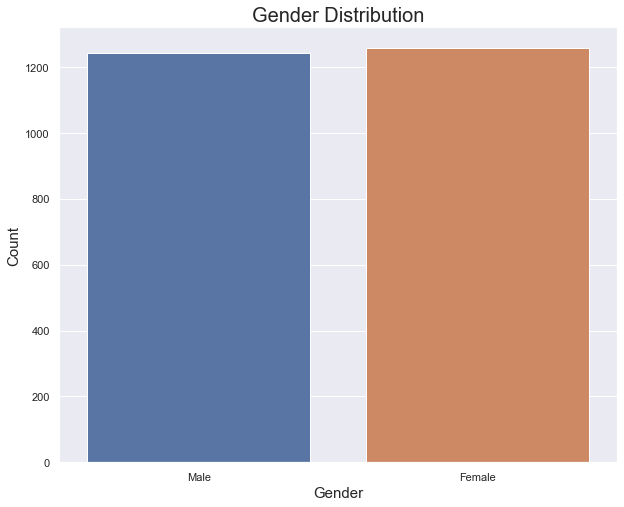

In [13]:
# Data visualization
# 1. Bar plot - Gender distribution

plt.figure(figsize = (10,8))
sns.countplot(x='Gender', data = Data)
plt.title('Gender Distribution',fontsize = 20)
plt.xlabel('Gender',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# 2. Pie Chart - Number of Users By Subscription Type

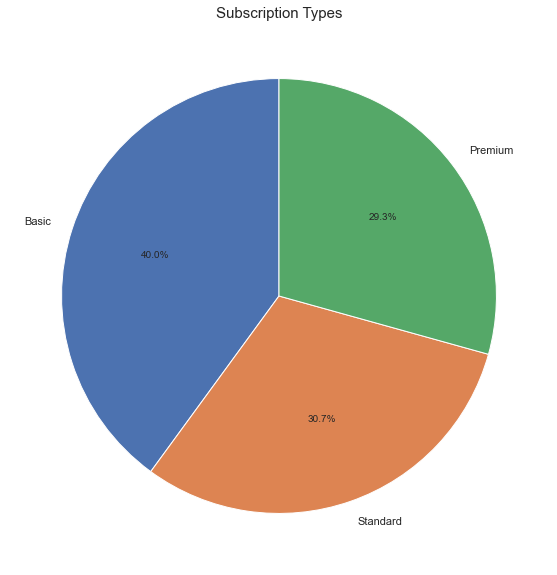

In [14]:
plt.figure(figsize = (10,10))
subscription_counts = Data['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Types',fontsize = 15)
plt.show()


# 3. Bar plot - Number of Active or Inactive Users By Subscription Type 

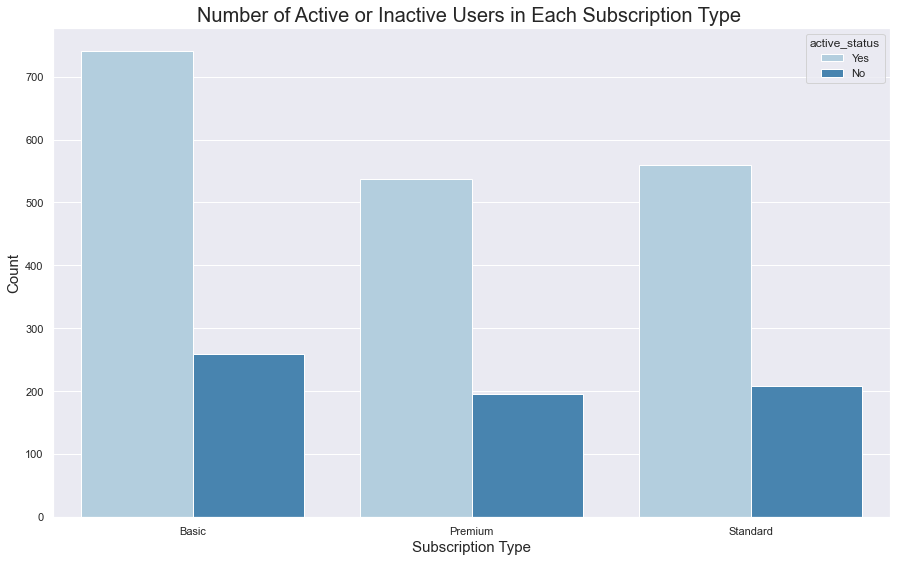

In [15]:
plt.figure(figsize = (15,9))
sns.countplot(x='Subscription Type', data = Data , hue = 'active_status',palette = 'Blues', alpha=1)
plt.title('Number of Active or Inactive Users in Each Subscription Type ',fontsize = 20)
plt.xlabel('Subscription Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# 4. Average monthly revenue by subscription type

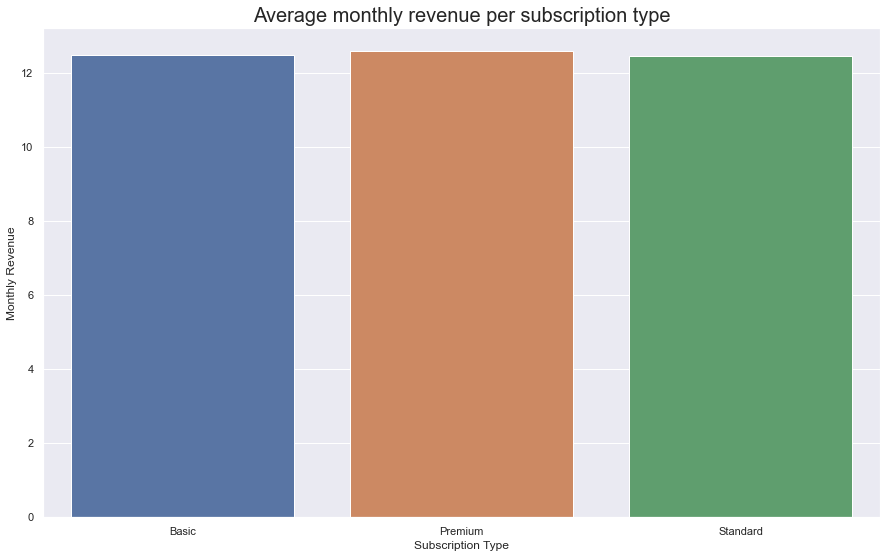

In [16]:
plt.figure(figsize = (15,9))
sns.barplot('Subscription Type','Monthly Revenue' , data = Data.groupby('Subscription Type')['Monthly Revenue'].mean().reset_index())
plt.title('Average monthly revenue per subscription type' , fontsize = 20)
plt.show()  

In [17]:
Data.groupby('Subscription Type')['Monthly Revenue'].mean()

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

# 5. Churn rate by subscription type

In [18]:
a = Data[Data['active_status']=='No'].groupby('Subscription Type').count()
a

,User ID,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,active_status
Subscription Type,,,,,,,,,,
Basic,259,259,259,259,259,259,259,259,259,259
Premium,196,196,196,196,196,196,196,196,196,196
Standard,208,208,208,208,208,208,208,208,208,208


In [19]:
Data['active_status'].value_counts()

Yes    1837
No      663
Name: active_status, dtype: int64

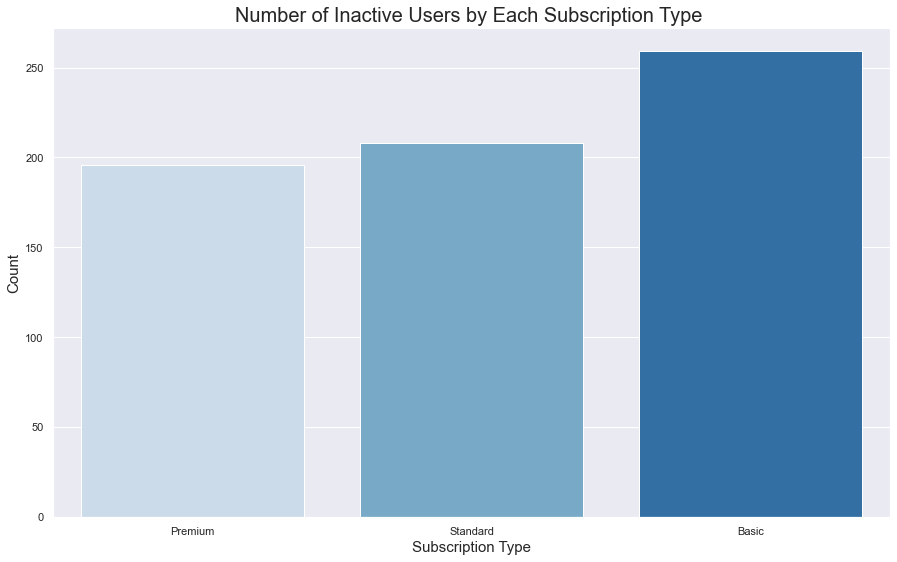

In [20]:
plt.figure(figsize = (15,9))
sns.countplot(x='Subscription Type', data = Data[Data['active_status']=='No'] ,palette = 'Blues', alpha=1)
plt.title('Number of Inactive Users by Each Subscription Type ',fontsize = 20)
plt.xlabel('Subscription Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [21]:
import random

def get_random_color():
    color = '#%06x' % random.randint(0, 0xFFFFFF)
    return color

colors = []
for i in range(10):
    color = get_random_color()
    colors.append(color)

# 6. Device distribution of users

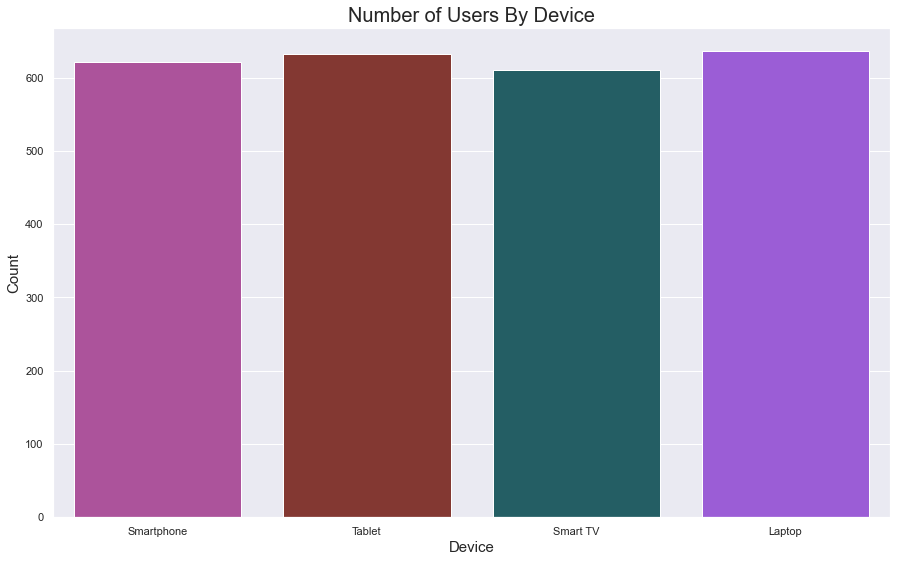

In [22]:
plt.figure(figsize = (15,9))
sns.countplot(x='Device', data = Data, palette = colors, alpha=1)
plt.title('Number of Users By Device',fontsize = 20)
plt.xlabel('Device',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# 7. Age distribution of users

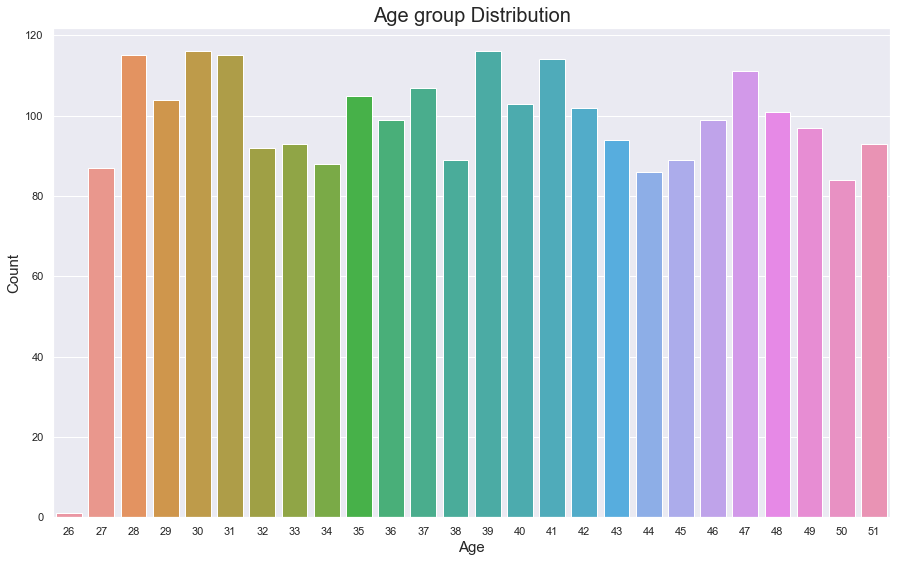

In [23]:
plt.figure(figsize = (15,9))
sns.countplot(x='Age', data = Data, alpha=1)
plt.title('Age group Distribution',fontsize = 20)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()


# 8. Heatmap -  Correlation Matrix 

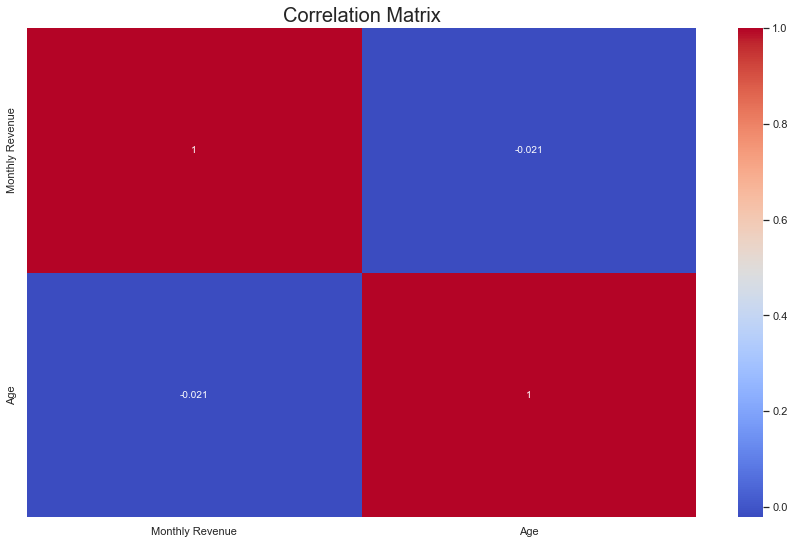

In [24]:
plt.figure(figsize = (15,9))
corr = Data[['Monthly Revenue','Age']].corr()
sns.heatmap(corr,annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix' , fontsize = 20)
plt.show()

# 9. Bar plot - Country distribution

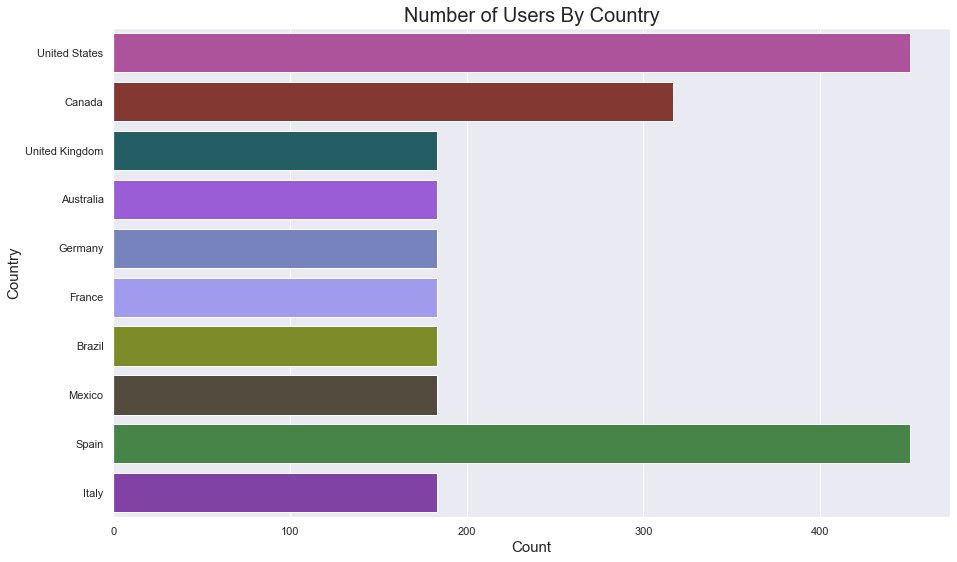

In [25]:
plt.figure(figsize = (15,9))
sns.countplot(y='Country', data = Data ,palette = colors ,alpha=1 )
plt.title('Number of Users By Country',fontsize = 20)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Country',fontsize = 15)
plt.show()

# 10. Violin plot - Age distribution by subscription type

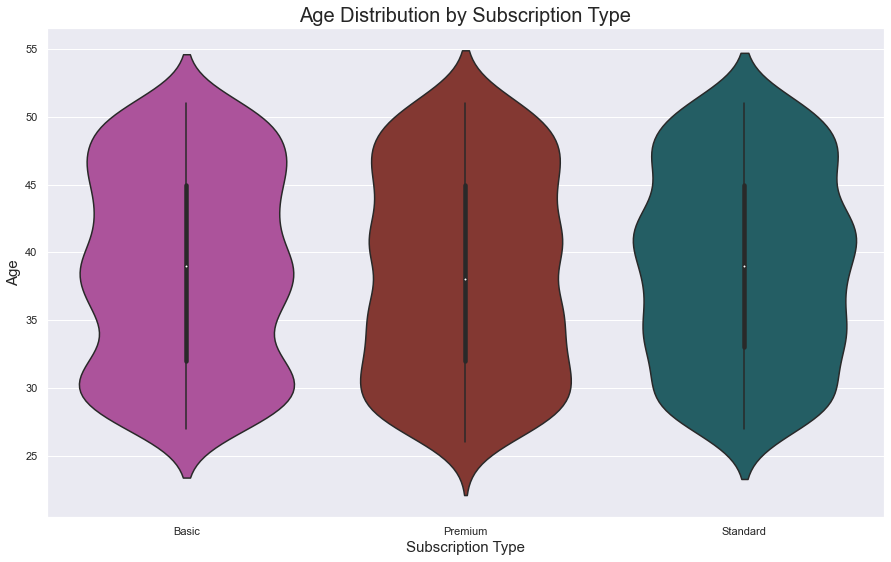

In [26]:
# Violin plot - Age distribution by subscription type
plt.figure(figsize = (15,9))
sns.violinplot(x='Subscription Type', y='Age', data=Data, palette=colors, alpha=1)
plt.title('Age Distribution by Subscription Type', fontsize = 20)
plt.xlabel('Subscription Type', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.show()

# Summary : 

1) Gender distribution: The gender distribution of Netflix users is slightly skewed towards females.
   This is evident from the fact that the percentage of female users is 50.3%, while the percentage of male users is 49.7%.

2) Subscription type distribution: The most popular subscription type among Netflix users is the basic plan, which accounts
    for 40.2% of all users.
    The standard plan accounts for 30.7% of all users, and the premium plan accounts for 29.1% of all users.
    
3) Inactive user distribution: The percentage of inactive users is higher among basic subscription users than standard or 
    premium subscription users.This is likely due to the fact that the basic plan is the least expensive plan, and users 
    may be more likely to cancel their subscription if they are not using Netflix as often.

4) Monthly revenue distribution: The average monthly revenue generated by premium subscription users is the highest, 
    followed by basic and standard subscription users. This is likely due to the fact that premium subscription users 
    have access to more features and content than basic or standard subscription users.

5) Device distribution: The most common device used to watch Netflix is a laptop. This is followed by tablets, smartphones,
    and smart TVs. This is likely due to the fact that laptops are more versatile than other devices, such as tablets 
    or smartphones, and they can be used to watch Netflix on a larger screen
    
6) Age distribution: The majority of Netflix users are between the ages of 27 and 45. This is likely due to the fact that 
    this age group is more likely to have disposable income and be interested in watching streaming content.